In [53]:
# Imports

import pandas as pd
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Read training data
data = pd.read_csv("train.csv")

# Import test data
df = pd.read_csv("test.csv")

# Print length of training and test data
print(len(data))
print(len(df))

# Print first 5 entries of df
data.head()

891
418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
len(data.columns)

12

Text(0.5, 1.0, 'Survived')

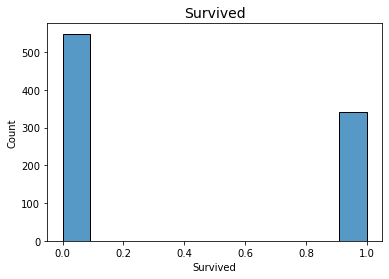

In [59]:
# Distribution of age

import seaborn as sns
# plt.hist([data["Survived"], data["Sex"]], color=['r','b'], alpha=0.5)

# sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data, x="Survived").set_title('Survived', fontsize=14)

Text(0.5, 1.0, 'Age Distribution')

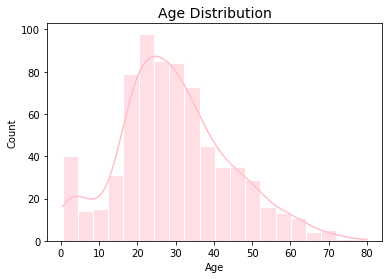

In [43]:
# Distribution of age
sns.cubehelix_palette(as_cmap=True)
sns.histplot(data=data, x="Age", kde=True, color='pink', edgecolor="white").set_title('Age Distribution', fontsize=14)

In [6]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.Survived.sum()/len(data)

0.3838383838383838

In [9]:
data.Ticket.nunique()

681

In [10]:
print("Missing values per Column:\n")

for col in data.columns:
    print(f'{col}: {data[col].isnull().sum()}')

Missing values per Column:

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
## Feature engineering
# PassengerID is redundant
# Name is hard to be a predictor
# Ticket has 681/891 so probably not a predictor
# Cabin a lot of missing values

# Save PassengerID
pID = df["PassengerId"]
print(len(pID))
delete = ["PassengerId", "Name", "Cabin", "Embarked", "Ticket", "Parch"]

for col in delete:
    del data[col]
    del df[col]

418


In [13]:
# Replace male/female by 0 or 1 in order to be readable by ML model
# Age has a lot of missing values, replace age by avg
# Embarked has 2 missing values, replace by S as it occurs most often
print(df['Age'].mean())
print(data['Age'].mean())
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)
df['Sex'].replace('female', 0, inplace=True)
df['Sex'].replace('male', 1, inplace=True)
df['Age'].fillna(data['Age'].mean(), inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
# data['Embarked'].fillna('S', inplace=True)
# df['Embarked'].fillna('S', inplace=True)
data.head()

30.272590361445783
29.69911764705882


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


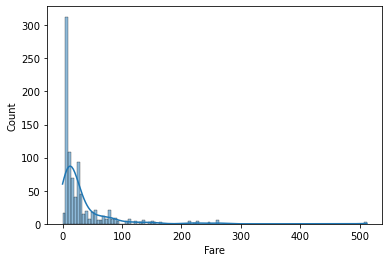

In [14]:
for i in ['Fare']:
    sns.histplot(data=data, x=i, kde=True)

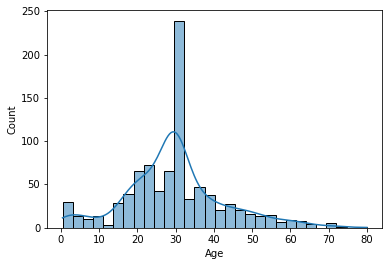

In [15]:
for i in ['Age']:
    sns.histplot(data=data, x=i, kde=True)

In [16]:
# Divide age group in 3
# Child, Adolescent, Old

dfs = [data, df]

for d in dfs:
    
    child = []
    yup = []
    old = []
    cheap = []
    expensive = []
    indices = []
    hclass = []
    lclass = []
    
    for j,i in enumerate(d.Pclass):
        if i < 3:
            hclass.append(0)
            lclass.append(1)
        else:
            hclass.append(1)
            lclass.append(0)
        
    
    for j,i in enumerate(d.Age):
        if i < 15:
            child.append(1)
            yup.append(0)
            old.append(0)
            indices.append(j)
        elif i < 45:
            child.append(0)
            yup.append(1)
            old.append(0)
        else:
            child.append(0)
            yup.append(0)
            old.append(1)

    for i in d.Fare:
        if i < 10:
            cheap.append(1)
            expensive.append(0)
        else:
            cheap.append(0)
            expensive.append(1)
        
    d["Child"] = child
    d["Young"] = yup
    d["Old"] = old
    d["Cheap"] = cheap
    d["Expensive"] = expensive
    d["High_class"] = hclass
    d["Low_class"] = lclass


    del d["Age"]
    del d["Fare"]
    del d["Pclass"]

In [17]:
for d in dfs:

    males = []
    females = []
#     fam = []
#     nofam = []

#     for j,i in enumerate(d.SibSp):
#         if i > 0:
#             fam.append(1)
#             nofam.append(0)
#         else:
#             nofam.append(1)
#             fam.append(0)

    for j,i in enumerate(d.Sex):
        if j in indices:
            males.append(0)
            females.append(0)
        elif i == 1:
            males.append(1)
            females.append(0)
        else:
            males.append(0)
            females.append(1)

    d["Male"] = males
    d["Female"] = females
#     d["Family"] = fam
#     d["No_family"] = nofam

    del d["Sex"]
#     del d["SibSp"]

In [18]:
data.corr()

,Survived,SibSp,Child,Young,Old,Cheap,Expensive,High_class,Low_class,Male,Female
Survived,1.000000,-0.035322,0.122978,-0.077981,-0.007857,-0.295081,0.295081,-0.322308,0.322308,-0.507522,0.532395
SibSp,-0.035322,1.000000,0.364654,-0.190497,-0.073339,-0.312503,0.312503,0.092548,-0.092548,-0.117062,0.111429
Child,0.122978,0.364654,1.000000,-0.589049,-0.119239,-0.216424,0.216424,0.087957,-0.087957,-0.077779,0.102126
Young,-0.077981,-0.190497,-0.589049,1.000000,-0.732094,0.285468,-0.285468,0.160803,-0.160803,0.022486,-0.050016
Old,-0.007857,-0.073339,-0.119239,-0.732094,1.000000,-0.168300,0.168300,-0.271715,0.271715,0.037939,-0.024638
Cheap,-0.295081,-0.312503,-0.216424,0.285468,-0.168300,1.000000,-1.000000,0.646414,-0.646414,0.229612,-0.255508
Expensive,0.295081,0.312503,0.216424,-0.285468,0.168300,-1.000000,1.000000,-0.646414,0.646414,-0.229612,0.255508
High_class,-0.322308,0.092548,0.087957,0.160803,-0.271715,0.646414,-0.646414,1.000000,-1.000000,0.119627,-0.131278
Low_class,0.322308,-0.092548,-0.087957,-0.160803,0.271715,-0.646414,0.646414,-1.000000,1.000000,-0.119627,0.131278
Male,-0.507522,-0.117062,-0.077779,0.022486,0.037939,0.229612,-0.229612,0.119627,-0.119627,1.000000,-0.927305


In [19]:
#One-hot encode/make dummies for variable Embarked

# one_hot = pd.get_dummies(data.Embarked, prefix='Embarked')
# data = data.drop('Embarked',axis = 1)
# data = data.join(one_hot)
# one_hot_ = pd.get_dummies(data.Pclass, prefix='Pclass')
# data = data.drop('Pclass',axis = 1)
# data = data.join(one_hot_)
# data.round(1)

In [20]:
#One-hot encode/make dummies for variable Embarked

# one_hotdf = pd.get_dummies(df.Embarked, prefix='Embarked')
# df = df.drop('Embarked',axis = 1)
# df = df.join(one_hotdf)
# one_hot_df = pd.get_dummies(df.Pclass, prefix='Pclass')
# df = df.drop('Pclass',axis = 1)
# df = df.join(one_hot_df)
# df.round(1)

In [21]:
# Convert dataframe to numpy arrays for ML
# Target variable

y = data.Survived.to_numpy()
data = data.drop('Survived', axis = 1)

In [22]:
X = data.to_numpy()

In [23]:
# raise NotImplementedError("Stop Running")

In [24]:
# Apply Machine learning (K-fold Crossvalidation)

names = ["Random Forest", "NaiveBayes", "Logistic Regression", "KNN"]
classifiers = [RandomForestClassifier(n_estimators=10), GaussianNB(), LogisticRegression(random_state=0), KNeighborsClassifier(n_neighbors=3)]

for i, clf in enumerate(classifiers):
    scores = cross_val_score(clf, X, y, cv=10)
    print(f"{names[i]}: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Random Forest: 0.81 accuracy with a standard deviation of 0.03
NaiveBayes: 0.76 accuracy with a standard deviation of 0.05
Logistic Regression: 0.81 accuracy with a standard deviation of 0.04
KNN: 0.81 accuracy with a standard deviation of 0.04


In [25]:
df.head()

,SibSp,Child,Young,Old,Cheap,Expensive,High_class,Low_class,Male,Female
0,0,0,1,0,1,0,1,0,1,0
1,1,0,0,1,1,0,1,0,0,1
2,0,0,0,1,1,0,0,1,1,0
3,0,0,1,0,1,0,1,0,1,0
4,1,0,1,0,0,1,1,0,0,1


In [26]:

X2 = df.to_numpy()
X2

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

In [27]:
# predict

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)
pred = rf.predict(X2)

In [28]:
result = pd.DataFrame(columns = ['PassengerId', 'Survived'])
result['PassengerId'] = pID
result['Survived'] = pred
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
# result.to_csv("second_submission.csv", index=False)